In [19]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

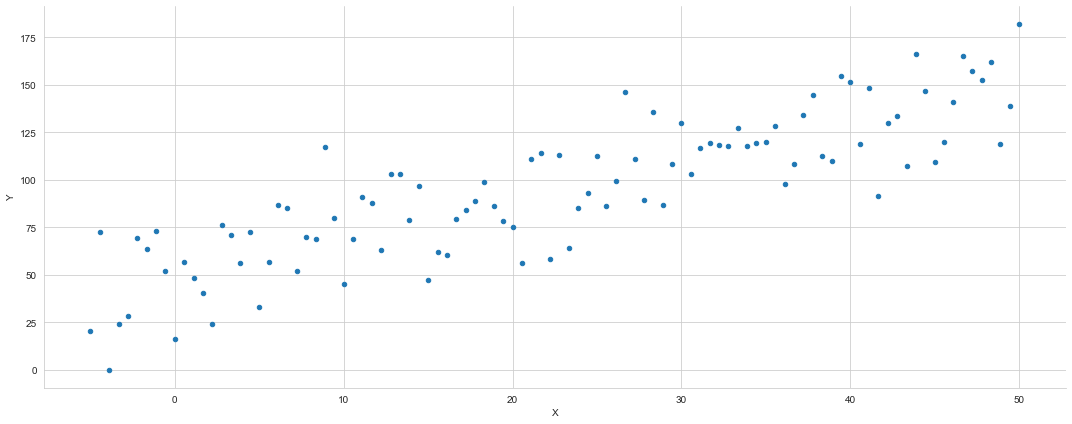

In [20]:
x = np.linspace(-5, 50 ,100)
y = 50 + 2*x+np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X':x, 'Y':y})
ax = data.plot.scatter(x='X', y='Y', figsize=(15, 6))
sns.despine()
plt.tight_layout()

In [21]:
X = sm.add_constant(data['X'])
mdl = sm.OLS(data['Y'], X).fit()
mdl.summary()
# 1st Table
# AIC - (−2Log(Likelihood)+2p) , MDL evaluation. lower is better
# BIC - (−2Log(Likelihood)+log(n)p), better than AIC. lower is better
# Prob(F-stat) - (MSR/MSE) could be related btw independent variables if the value is below 0.05
# DF MDL - # of independent variables
# DF Residuals - degree of the freedom (Total N - # of independent variables - # of dependent variable)

# 2nd Table
# t: t-test, more correlated if the value is bigger
# P-value(P>|t|)- significant probability of the independent variables, normally P-value < 0.05 to be significant
# confidence area: 0.025 ~ 0.975

# 3rd Table
# Omnibus: D'Angostino's Test, follows normal distribution as the value is bigger
# Prob(Omnibus): significant probability(generally when below 0.05)
# Skew: symmetric as approaching 0
# Kurtosis: approaching normal distribution as the value approaches 3, x < 0: flat, 3 < x sharp
# Durbin-Watson: approaching 0 or 4(could be auto-correlated), 1.5~2.5(residuals are independent)
# Jarque-Bera(JB): normally distributed data used as the value is bigger
# Cond.No(Condition Index): multicollinearity test exists if the value is over 10. If muticollinearity exists, 1. remove that independent variable 2. increasing samples 3. using recomposition used by PCA to reduce the dimension and variation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     257.7
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.45e-29
Time:                        14:35:52   Log-Likelihood:                -440.24
No. Observations:                 100   AIC:                             884.5
Df Residuals:                      98   BIC:                             889.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0446      3.438     14.555      0.000      43.221      56.868
X              1.9979      0.124     16.055      0.000       1.751       2.245
==============================================================================
Omnibus:                        2.046   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.516
Skew:                          -0.086   Prob(JB):                        0.469
Kurtosis:                       2.422   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   50.04
X        2.00
dtype: float64

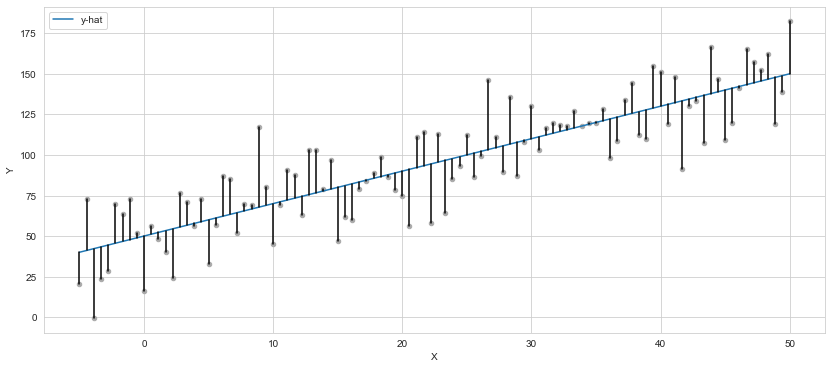

In [23]:
data['y-hat'] = mdl.predict()
data['residuals'] = mdl.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14, 6))
data.plot.line(x='X', y='y-hat', ax=ax)
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')

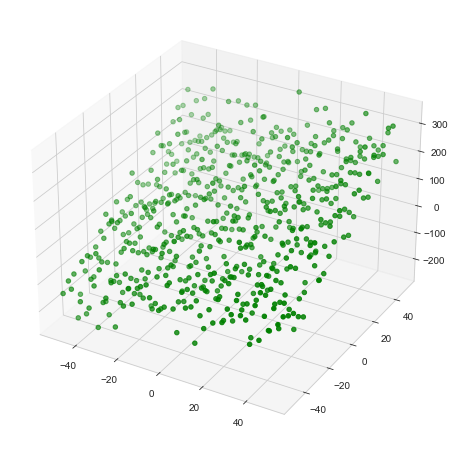

In [37]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1':X_1.ravel(), 'X_2':X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## plot
threeD = plt.figure(figsize=(15, 8)).add_subplot(projection='3d')
threeD.scatter(data.X_1, data.X_2, data.Y, c='g')

In [39]:
X = data[['X_1', 'X_2']]
y = data['Y']
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.54e-207
Time:                        15:23:43   Log-Likelihood:                -3333.2
No. Observations:                 625   AIC:                             6672.
Df Residuals:                     622   BIC:                             6686.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3190      2.009     25.541      0.000      47.373      55.265
X_1            0.9691      0.067     14.492      0.000       0.838       1.100
X_2            3.0233      0.067     45.210      0.000       2.892       3.155
==============================================================================
Omnibus:                        0.629   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.655
Skew:                           0.077   Prob(JB):                        0.721
Kurtosis:                       2.959   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y)) # (X x y)/(x**2)
pd.Series(beta, index=X_ols.columns)

const   51.32
X_1      0.97
X_2      3.02
dtype: float64

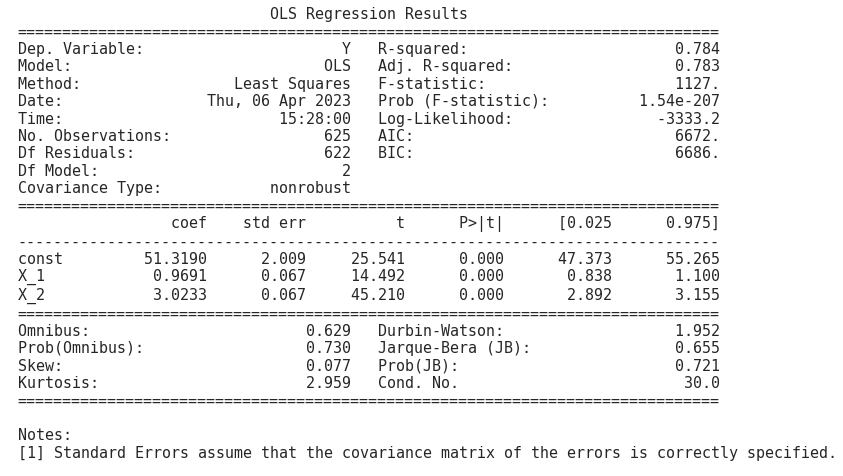

In [52]:
# save file
# plt.rc('figure', figsize=(12, 8))
# plt.text(0.02, 0.1, str(model.summary()), {'fontsize': 15}, fontproperties = 'monospace')
# plt.axis('off')
# plt.tight_layout()
# plt.subplots_adjust(left=0.2, right=0.8, top=0.2, bottom=0)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

Text(0.5, 0, '$Y, \\hat{Y}$')

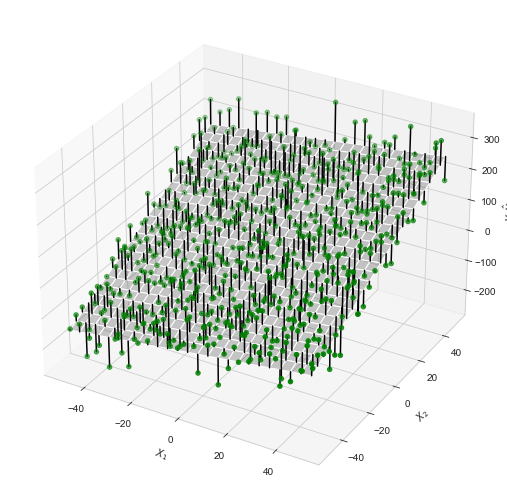

In [62]:
three_D = plt.figure(figsize=(17, 9)).add_subplot(projection='3d')
three_D.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_D.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_D.set_xlabel('$X_1$')
three_D.set_ylabel('$X_2$')
# math expression references: https://matplotlib.org/3.7.1/tutorials/text/mathtext.html
three_D.set_zlabel('$Y, \hat{Y}$')

In [78]:
X[:5]

,X_1,X_2
0,-50.00,-50.00
1,-50.00,-45.83
2,-50.00,-41.67
3,-50.00,-37.50
4,-50.00,-33.33


In [63]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

# fit_intercept = shuffle
# learning_rate='invscaling' : reducing learning-rate by time passes
sgd = SGDRegressor(loss='squared_loss', fit_intercept=True, shuffle=True, random_state=1,
                   learning_rate='invscaling', eta0=0.01, power_t=0.25)
sgd.fit(X=X_, y=y)
coeff = (sgd.coef_*scaler.scale_) + scaler.mean_
pd.Series(coeff, index=X.columns)

X_1     875.05
X_2   2,732.42
dtype: float64

In [77]:
X_[:5]

array([[-1.66410059, -1.66410059],
       [-1.66410059, -1.52542554],
       [-1.66410059, -1.38675049],
       [-1.66410059, -1.24807544],
       [-1.66410059, -1.10940039]])

sgd   50.11
ols   50.11
dtype: float64

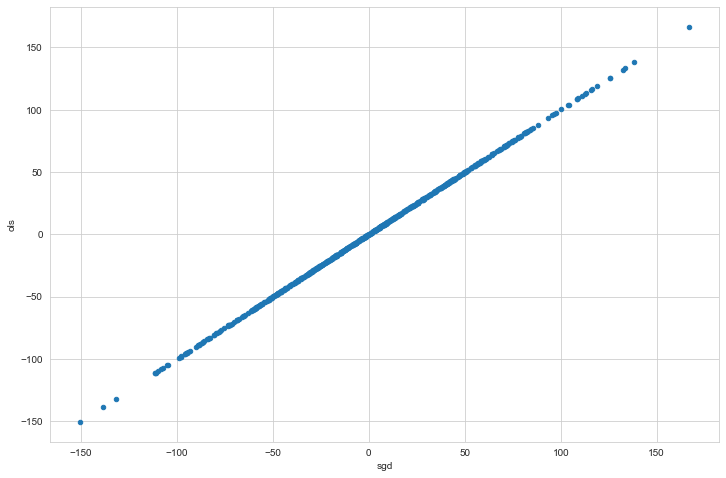

In [72]:
resid = pd.DataFrame({'sgd':y - sgd.predict(X_), 'ols':y-model.predict(sm.add_constant(X))})
resid.plot.scatter(x='sgd', y='ols')
resid.pow(2).sum().div(len(y)).pow(.5)